D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


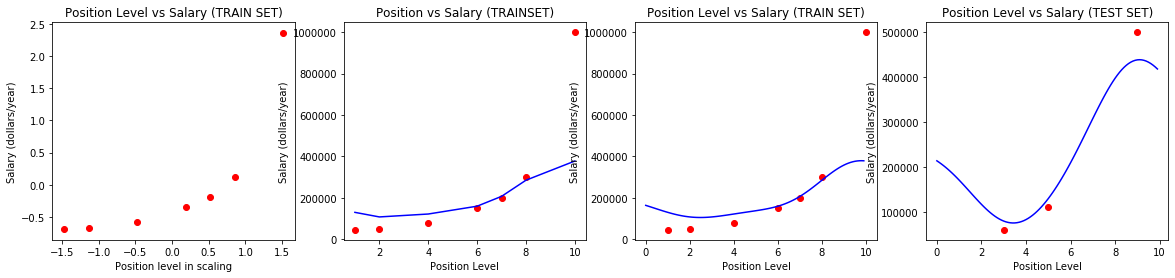

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

train_set = pd.read_csv("Position_SalariesTrain.csv")
test_set = pd.read_csv("Position_SalariesTest.csv")

X_train = train_set.iloc[:, 1:-1].values
y_train = train_set.iloc[:, -1].values.reshape(-1,1)

X_test = test_set.iloc[:, 1:-1].values
y_test = test_set.iloc[:, -1].values.reshape(-1,1)

SC_X = StandardScaler()
SC_y = StandardScaler()
X_train_trans = SC_X.fit_transform(X_train)
y_train_trans = SC_y.fit_transform(y_train)
X_test_trans = SC_X.fit_transform(X_test)
y_test_trans = SC_y.fit_transform(y_test)

def predict(model, X_train, SC_X, SC_y):
    X_train_trans = SC_X.transform(X_train)
    y_train_trans_pred = model.predict(X_train_trans)
    y_train_pred = SC_y.inverse_transform(y_train_trans_pred)
    return y_train_pred
y_train_pred = predict(svr_train, X_train, SC_X, SC_y)

plt.figure(figsize = (20,4))
plt.subplot(1,4,1)
plt.scatter(X_train_trans, y_train_trans, color = "red")
plt.title("Position Level vs Salary (TRAIN SET)")
plt.xlabel("Position level in scaling")
plt.ylabel("Salary (dollars/year)")

svr_train = SVR(kernel = "rbf")
svr_train.fit(X_train_trans, y_train_trans)
svr_test = SVR(kernel = "rbf")
svr_test.fit(X_test_trans, y_test_trans)

plt.subplot(1,4,2)
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, y_train_pred, color = "blue")
plt.title("Position vs Salary (TRAINSET)")
plt.xlabel("Position Level")
plt.ylabel("Salary (dollars/year)")

X_train_dummy = np.arange(0, 10, 0.1).reshape(-1, 1)
y_train_dummy_pred = predict(svr_train, X_train_dummy, SC_X, SC_y)

plt.subplot(1,4,3)
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train_dummy, y_train_dummy_pred, color = "blue")
plt.title("Position Level vs Salary (TRAIN SET)")
plt.xlabel("Position Level")
plt.ylabel("Salary (dollars/year)")

X_test_dummy = np.arange(0, 10, 0.1).reshape(-1, 1)
y_test_dummy_pred = predict(svr_test, X_test_dummy, SC_X, SC_y)

plt.subplot(1,4,4)
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test_dummy, y_test_dummy_pred, color = "blue")
plt.title("Position Level vs Salary (TEST SET)")
plt.xlabel("Position Level")
plt.ylabel("Salary (dollars/year)")
plt.savefig("test1.PNG")
plt.show()


